In [1]:
import numpy as np 
import gzip as gz 
from tqdm.notebook import tqdm
import torch as th 
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


from tensorflow.keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Cassette study

In [3]:
with open('cassette-th-data.pck', 'rb') as fichier:
    # Charger les données sérialisées à partir du fichier
    datas = pickle.load(fichier)

# Faire quelque chose avec l'objet chargé
print(datas)

(tensor([[  -9.1167,    4.1888,   -6.6527,  ..., -133.3013, -148.5780,
         -126.4022],
        [ -51.0044,  -53.4684,  -12.0735,  ...,  -43.1197,  -31.2926,
          -30.7998],
        [  -3.2032,   -2.2176,    1.2320,  ...,  -24.8862,  -20.4510,
          -11.5807],
        ...,
        [   2.6835,   -6.0505,   -3.1392,  ...,   16.7551,   22.0926,
           17.2403],
        [ -18.6664,  -16.7255,  -19.1516,  ...,    7.5358,   30.3414,
           11.9028],
        [  -2.6540,   -3.6244,   -3.6244,  ...,  -10.4176,   -5.0801,
           -7.9915]]), tensor([[ 54.9468,  58.3963,  69.7306,  ...,  85.0073,  51.4972, -43.6125],
        [ -7.6383, -11.0879,  -4.1888,  ...,   3.2032,  -3.2032, -11.0879],
        [ 15.0303,   8.6239,  10.1023,  ...,  10.1023,  18.4799,  14.5375],
        ...,
        [ 10.4471,  -3.6244,  -7.5062,  ...,   8.0210,  12.3880,   6.0801],
        [-49.7209, -52.6322, -61.3663,  ...,   8.9915,  10.9324,  11.9028],
        [ -9.4471, -11.3880,  -9.9324,  ..., 

In [4]:
class_dict = {
    0: "W",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM"
}

class_names = ['0','1','2','3','4']

def print_n_samples_each_class(labels):
    import numpy as np
    unique_labels = np.unique(labels)
    for c in unique_labels:
        n_samples = len(np.where(labels == c)[0])
        print("{}: {}".format(class_dict[c], n_samples))

In [5]:
# passage de pytorch a tensorflow que je préfère utiliser
xtrain = tf.convert_to_tensor(datas[0].numpy())
xvalid = tf.convert_to_tensor(datas[1].numpy())
ytrain = tf.convert_to_tensor(datas[2].numpy())
yvalid = tf.convert_to_tensor(datas[3].numpy())

In [6]:
np.shape(xtrain), np.shape(ytrain)

(TensorShape([175995, 600]), TensorShape([175995]))

J'ai eu beaucoup de problèmes d'où le fait que le code n'est pas très cohérent car tout fonctionnait au début mais j'ai essayé de run mon transformers qui a fait crash mon ordinateur 2 fois et lorsque je l'ai relancé les packages buggaient tous j'ai essayé de tout réinstaller from scratch mais ça ne fonctionnait plus j'ai ensuite voulu utiliser le modèle que je jugeais le plus performant mais il prenait des plombes à réentrainer, et je l'avais save mais il ne veut plus le charger à cause de problèmes de package... j'ai donc choisis de travailler avec un cnn performant qui en soit a d'assez bon résultats comparés aux autres.

# CNN

In [7]:
input_shape = (600,1)

In [16]:
model_cnn = tf.keras.Sequential(name="model_cnn")
model_cnn.add(tf.keras.layers.Reshape((600, 1), input_shape=(600,)))
model_cnn.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(5, activation='softmax'))  


model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_cnn.fit(xtrain, ytrain, epochs=6, batch_size = 200,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

Epoch 1/6
880/880 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.5323 - loss: 1.4275 - val_accuracy: 0.6709 - val_loss: 0.8681
Epoch 2/6
880/880 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.6633 - loss: 0.8705 - val_accuracy: 0.6651 - val_loss: 0.8495
Epoch 3/6
880/880 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.6698 - loss: 0.8454 - val_accuracy: 0.6599 - val_loss: 0.8693
Epoch 4/6
880/880 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.6753 - loss: 0.8316 - val_accuracy: 0.6590 - val_loss: 0.8707
Epoch 5/6
880/880 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.6809 - loss: 0.8202 - val_accuracy: 0.6689 - val_loss: 0.8500
Epoch 6/6
880/880 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.6842 - loss: 0.8106 - val_accuracy: 0.6782 - val_loss: 0.8299


609/609 - 1s - 2ms/step - accuracy: 0.6782 - loss: 0.8299


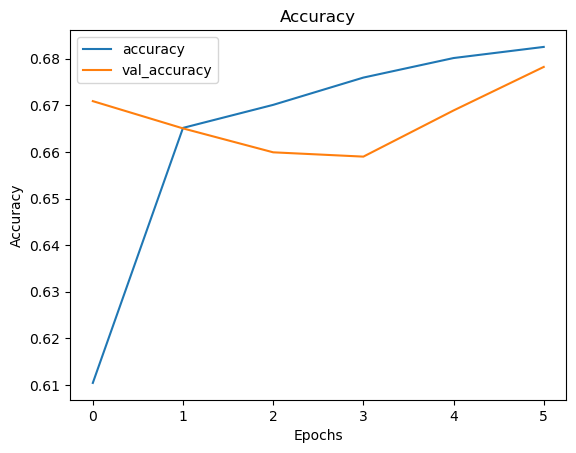

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

test_loss, test_acc_cnn = model_cnn.evaluate(xvalid,  yvalid, verbose=2)


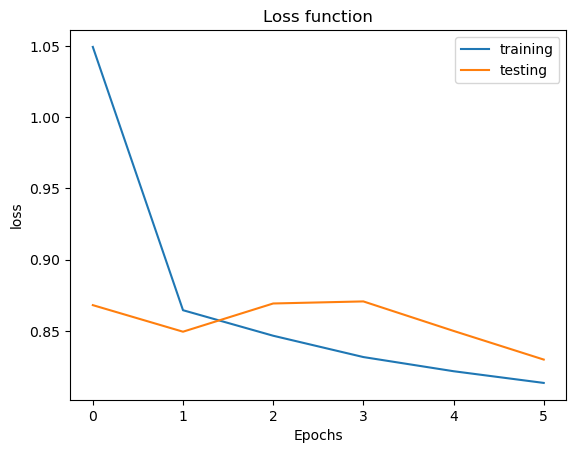

In [18]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

In [19]:
image = tf.expand_dims(xvalid[10], axis=0)
ypred = model_cnn.predict(image)
max_index = tf.argmax(ypred[0])
predicted_class = class_names[max_index.numpy()]
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2


In [20]:
def prediction(eog, model): # fonction qui donne la prédiction de la phase du sommeil d'un eog de shape tensor([600])
  ypred = model.predict(tf.expand_dims(eog, axis=0))
  max_index = tf.argmax(ypred[0])
  predicted_class = class_names[max_index.numpy()]
  return(f"Le modèle de prédiction donne que le patient est dans un sommeil de type {predicted_class}")

In [121]:
eeg = xvalid[5]
prediction(eeg, model_cnn), yvalid[5]

1/1 [==============================] - 0s 17ms/step


('Le modèle de prédiction donne que le patient est dans un sommeil de type 3',
 <tf.Tensor: shape=(), dtype=int32, numpy=3>)

On ne va pas chercher plus loin à développer ce modèle mais on va se concentrer sur d'autres modèles

# LSTM and GRU on the raw signal

LSTM

In [11]:
np.shape(xtrain)

TensorShape([175995, 600])

In [119]:
input_shape = (600,1)
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=64, input_shape=input_shape))
model_lstm.add(tf.keras.layers.Dense(5, activation='sigmoid')) 
# si on veut gérer le learning rate mettre optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_lstm.fit(xtrain, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])


Epoch 1/4
880/880 [==============================] - 298s 336ms/step - loss: 1.1804 - accuracy: 0.5527 - val_loss: 1.1169 - val_accuracy: 0.5684
Epoch 2/4
880/880 [==============================] - 296s 336ms/step - loss: 1.0689 - accuracy: 0.5922 - val_loss: 0.9995 - val_accuracy: 0.6183
Epoch 3/4
880/880 [==============================] - 15928s 18s/step - loss: 1.0145 - accuracy: 0.6138 - val_loss: 0.9529 - val_accuracy: 0.6377
Epoch 4/4
880/880 [==============================] - 338s 384ms/step - loss: 0.9375 - accuracy: 0.6434 - val_loss: 0.9113 - val_accuracy: 0.6558


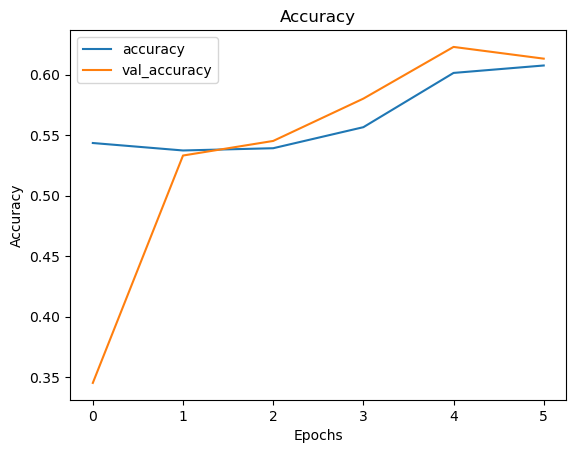

In [69]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()



609/609 - 45s - loss: 0.9113 - accuracy: 0.6558 - 45s/epoch - 74ms/step


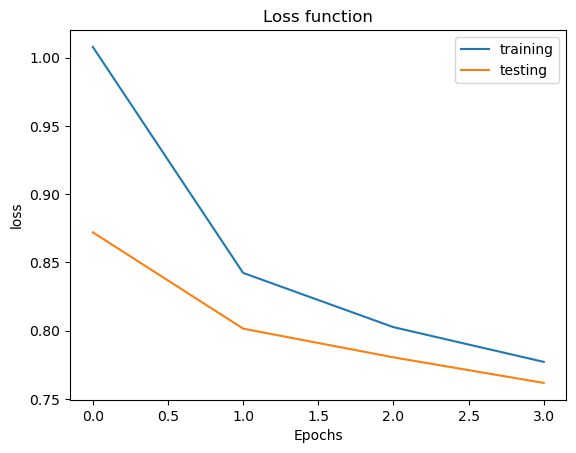

In [138]:
test_loss, test_acc_lstm = model_lstm.evaluate(xvalid,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

In [123]:
eog = xvalid[5]
prediction(eog, model_lstm)

1/1 [==============================] - 0s 52ms/step


'Le modèle de prédiction donne que le patient est dans un sommeil de type 3'

GRU

Epoch 1/4
880/880 [==============================] - 298s 337ms/step - loss: 1.0491 - accuracy: 0.6012 - val_loss: 0.9082 - val_accuracy: 0.6598
Epoch 2/4
880/880 [==============================] - 295s 336ms/step - loss: 0.8652 - accuracy: 0.6740 - val_loss: 0.8341 - val_accuracy: 0.6867
Epoch 3/4
880/880 [==============================] - 291s 331ms/step - loss: 0.8294 - accuracy: 0.6861 - val_loss: 0.8088 - val_accuracy: 0.6933
Epoch 4/4
880/880 [==============================] - 292s 332ms/step - loss: 0.8120 - accuracy: 0.6906 - val_loss: 0.7870 - val_accuracy: 0.7006
609/609 - 49s - loss: 0.7870 - accuracy: 0.7006 - 49s/epoch - 80ms/step


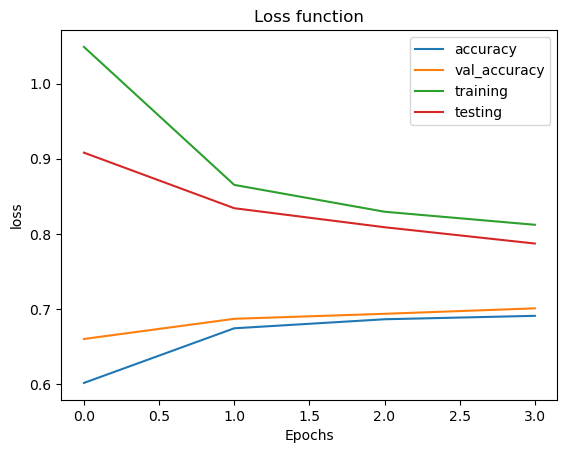

In [125]:
model_gru = tf.keras.Sequential()
model_gru.add(tf.keras.layers.GRU(units=64, input_shape=input_shape))
model_gru.add(tf.keras.layers.Dense(5, activation='softmax'))  
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_gru.fit(xtrain, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])



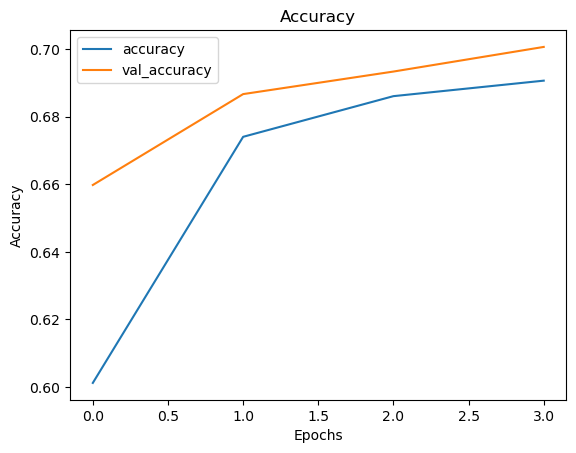

In [126]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

une accuracy qui monte assez haut sur le valid 

609/609 - 47s - loss: 0.7870 - accuracy: 0.7006 - 47s/epoch - 77ms/step


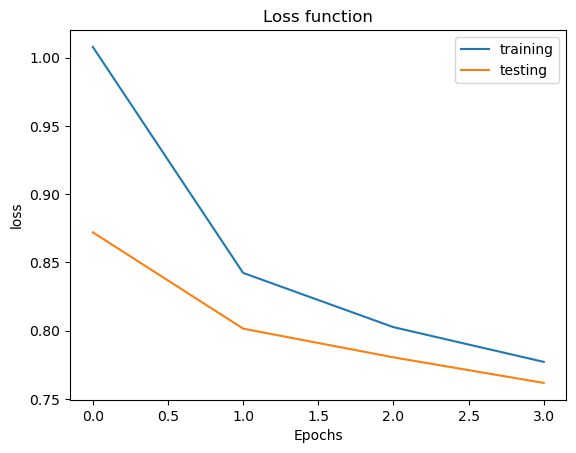

In [137]:
test_loss, test_acc_gru = model_gru.evaluate(xvalid,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

In [128]:
eog = xvalid[5]
prediction(eog, model_gru)

1/1 [==============================] - 0s 365ms/step


'Le modèle de prédiction donne que le patient est dans un sommeil de type 3'

Bi-LSTM

Epoch 1/4
880/880 [==============================] - 533s 602ms/step - loss: 1.1387 - accuracy: 0.5629 - val_loss: 1.0458 - val_accuracy: 0.5966
Epoch 2/4
880/880 [==============================] - 516s 586ms/step - loss: 1.0618 - accuracy: 0.5939 - val_loss: 1.0089 - val_accuracy: 0.6196
Epoch 3/4
880/880 [==============================] - 528s 600ms/step - loss: 0.9742 - accuracy: 0.6315 - val_loss: 0.9252 - val_accuracy: 0.6484
Epoch 4/4
880/880 [==============================] - 2410s 3s/step - loss: 0.9122 - accuracy: 0.6537 - val_loss: 0.8750 - val_accuracy: 0.6708


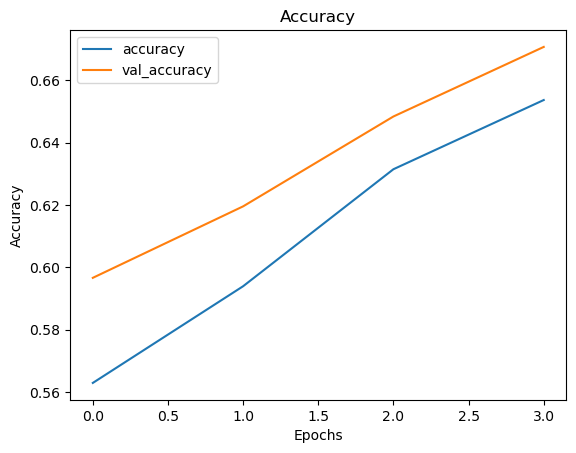

In [129]:
model_bilstm = tf.keras.Sequential()
model_bilstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64), input_shape=input_shape))
model_bilstm.add(tf.keras.layers.Dense(5, activation='softmax'))  
model_bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_bilstm.fit(xtrain, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

609/609 - 75s - loss: 0.8750 - accuracy: 0.6708 - 75s/epoch - 123ms/step


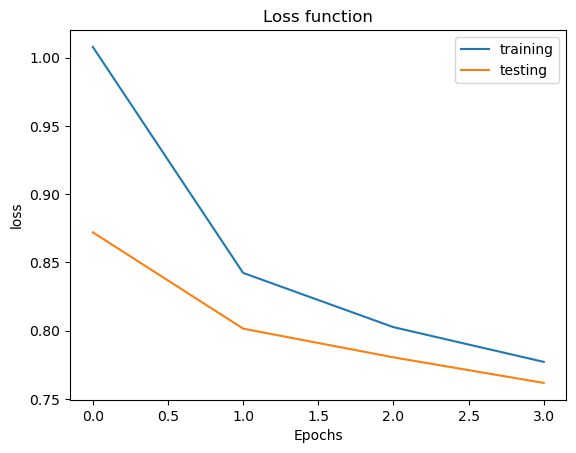

In [136]:
test_loss, test_acc_bilstm = model_bilstm.evaluate(xvalid,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

In [131]:
prediction(eog, model_bilstm)

1/1 [==============================] - 1s 651ms/step


'Le modèle de prédiction donne que le patient est dans un sommeil de type 3'

Bi-GRU

In [14]:
model_bigru = tf.keras.Sequential()
model_bigru.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=64), input_shape=input_shape))
model_bigru.add(tf.keras.layers.Dense(5, activation='softmax'))  
model_bigru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_bigru.fit(xtrain, ytrain, epochs=4, batch_size = 500,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()



Epoch 1/4
 95/352 ━━━━━━━━━━━━━━━━━━━━ 4:18 1s/step - accuracy: 0.4391 - loss: 1.4229

KeyboardInterrupt: 

In [19]:
from sklearn.metrics import classification_report
y_pred = model_bigru.predict(xvalid)
print(classification_report(yvalid.numpy(), y_pred.argmax(axis=1)))

NameError: name 'model_bigru' is not defined

In [19]:
model_bigru.save("model_bigru")

INFO:tensorflow:Assets written to: model_bigru\assets


INFO:tensorflow:Assets written to: model_bigru\assets


In [12]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model("model_bigru")

# Utiliser le modèle pour des prédictions
predictions = model.predict(xvalid)

ValueError: File format not supported: filepath=model_bigru. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model_bigru, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

609/609 - 80s - loss: 0.7617 - accuracy: 0.7100 - 80s/epoch - 132ms/step


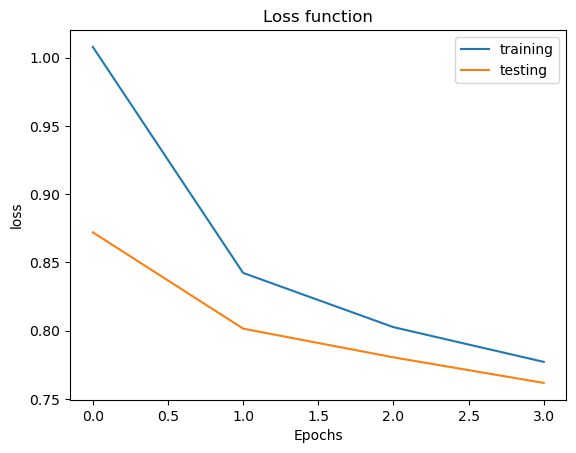

In [134]:
test_loss, test_acc_bigru = model_bigru.evaluate(xvalid,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

# Tableau comparatif des modèles sur le raw data

J'aurai du comparer le F1 score mais comme ce n'est pas je pense le modèle final, je me contente de comparer l'accuracy même si je sais que ce n'est pas la seule mesure loin de là à prendre en compte. Pour autant, le GRU et le bi-GRU semble être les modèles les plus performants.

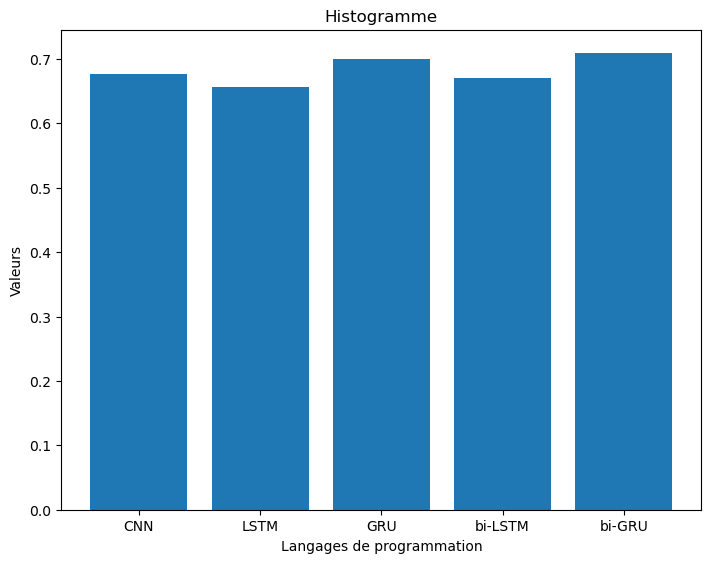

In [144]:

# Préparation de la figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

etiquettes = ['CNN', 'LSTM', 'GRU', 'bi-LSTM', 'bi-GRU']
valeurs =  [test_acc_cnn, test_acc_lstm,test_acc_gru,test_acc_bilstm,test_acc_bigru]

# Affichage des données
ax.bar(etiquettes, valeurs)

plt.title("Histogramme")  # Titre du graphique
plt.ylabel('Valeurs')  # Titre de l'axe y
plt.xlabel('Modèle')
plt.show()  # Affichage d'une courbe

# LSTM and GRU on spectrums

In [21]:
from scipy.signal import spectrogram

In [22]:
np.shape(datas[0].numpy()[0])

(600,)

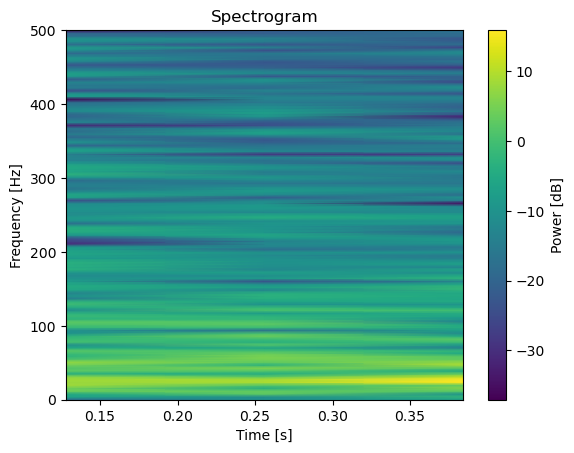

In [23]:
window_length = 256  # Longueur de la fenêtre
overlap = 128  # Chevauchement entre les fenêtres
fs = 1000  # Fréquence d'échantillonnage en Hz

# Calculer le spectre sur une fenêtre glissante
frequencies, times, Sxx = spectrogram(datas[0].numpy()[5], fs=fs, window='hann', nperseg=window_length, noverlap=overlap)

# Afficher le spectre
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.colorbar(label='Power [dB]')
plt.show()

In [163]:
# On va transformer les xtrain et xvalid en leurs spectres

spectrograms_xtrain = []
spectrograms_xvalid = []

for signal in xtrain:
    _, _, Sxx = spectrogram(signal, fs=fs, window='hann', nperseg=window_length, noverlap=overlap)
    spectrograms_xtrain.append(Sxx)
spectrograms_xtrain = np.array(spectrograms_xtrain)
for signal in xvalid:
    _, _, Sxx = spectrogram(signal, fs=fs, window='hann', nperseg=window_length, noverlap=overlap)
    spectrograms_xvalid.append(Sxx)
spectrograms_xvalid = np.array(spectrograms_xvalid)

In [169]:
np.shape(spectrograms_xtrain), type(spectrograms_xtrain)

((175995, 129, 3), numpy.ndarray)

In [170]:
xtrain_spec = tf.convert_to_tensor(spectrograms_xtrain)
xvalid_spec = tf.convert_to_tensor(spectrograms_xvalid)

In [171]:
np.shape(xtrain_spec), type(xtrain_spec)

(TensorShape([175995, 129, 3]), tensorflow.python.framework.ops.EagerTensor)

Epoch 1/4
880/880 [==============================] - 57s 62ms/step - loss: 1.0414 - accuracy: 0.6003 - val_loss: 0.9364 - val_accuracy: 0.6490
Epoch 2/4
880/880 [==============================] - 55s 63ms/step - loss: 0.9011 - accuracy: 0.6543 - val_loss: 0.8946 - val_accuracy: 0.6566
Epoch 3/4
880/880 [==============================] - 58s 66ms/step - loss: 0.8736 - accuracy: 0.6641 - val_loss: 0.8537 - val_accuracy: 0.6740
Epoch 4/4
880/880 [==============================] - 58s 66ms/step - loss: 0.8565 - accuracy: 0.6700 - val_loss: 0.8523 - val_accuracy: 0.6688


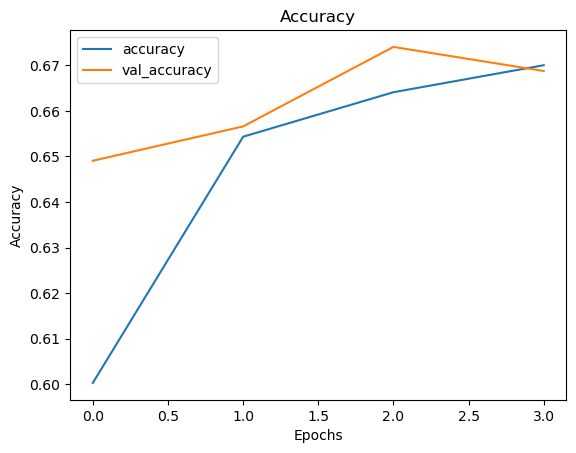

In [172]:
# LSTM
model_lstm_spec = tf.keras.Sequential()
model_lstm_spec.add(tf.keras.layers.LSTM(units=64, input_shape=(129, 3)))
model_lstm_spec.add(tf.keras.layers.Dense(5, activation='softmax'))  
model_lstm_spec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_lstm_spec.fit(xtrain_spec, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid_spec, yvalid), callbacks = [early_stopping])


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()


déjà je remarque que l'entrainement prends beaucoup moins de temps que sur les raw data 

609/609 - 9s - loss: 0.8523 - accuracy: 0.6688 - 9s/epoch - 14ms/step


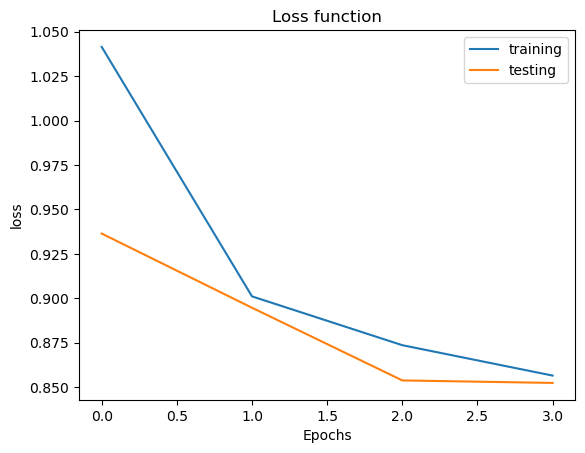

In [173]:

test_loss, test_acc_lstmspec = model_lstm_spec.evaluate(xvalid_spec,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

Epoch 1/4
880/880 [==============================] - 107s 118ms/step - loss: 0.9169 - accuracy: 0.6544 - val_loss: 0.8741 - val_accuracy: 0.6655
Epoch 2/4
880/880 [==============================] - 160s 182ms/step - loss: 0.8451 - accuracy: 0.6776 - val_loss: 0.8257 - val_accuracy: 0.6849
Epoch 3/4
880/880 [==============================] - 165s 188ms/step - loss: 0.8216 - accuracy: 0.6866 - val_loss: 0.8143 - val_accuracy: 0.6907
Epoch 4/4
880/880 [==============================] - 155s 176ms/step - loss: 0.8078 - accuracy: 0.6908 - val_loss: 0.7994 - val_accuracy: 0.6912


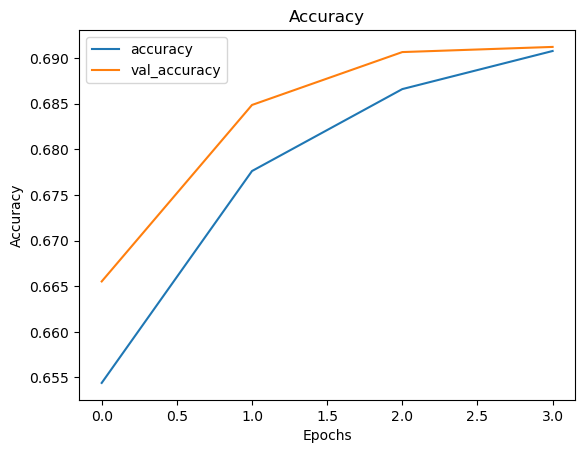

In [174]:
# Bi-LSTM
model_bilstm_spec = tf.keras.Sequential()
model_bilstm_spec.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64), input_shape=(129, 3)))
model_bilstm_spec.add(tf.keras.layers.Dense(5, activation='softmax'))  
model_bilstm_spec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_bilstm_spec.fit(xtrain_spec, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid_spec, yvalid), callbacks = [early_stopping])


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

609/609 - 22s - loss: 0.7994 - accuracy: 0.6912 - 22s/epoch - 37ms/step


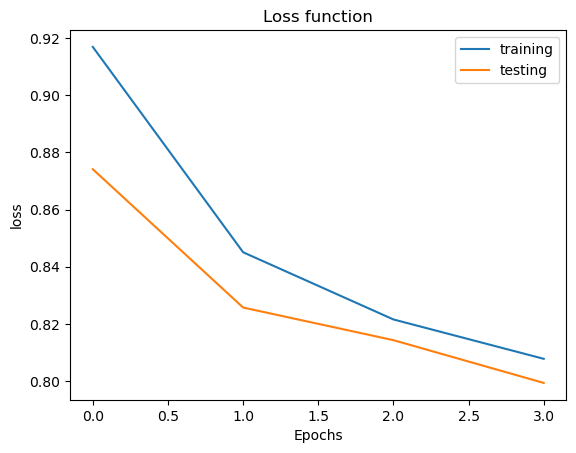

In [175]:

test_loss, test_acc_bilstmspec = model_bilstm_spec.evaluate(xvalid_spec,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

Epoch 1/4
880/880 [==============================] - 151s 171ms/step - loss: 0.7975 - accuracy: 0.6942 - val_loss: 0.7930 - val_accuracy: 0.6955
Epoch 2/4
880/880 [==============================] - 151s 171ms/step - loss: 0.7898 - accuracy: 0.6976 - val_loss: 0.7815 - val_accuracy: 0.7005
Epoch 3/4
880/880 [==============================] - 151s 172ms/step - loss: 0.7839 - accuracy: 0.6989 - val_loss: 0.7810 - val_accuracy: 0.6979
Epoch 4/4
880/880 [==============================] - 155s 176ms/step - loss: 0.7787 - accuracy: 0.7003 - val_loss: 0.7789 - val_accuracy: 0.7000


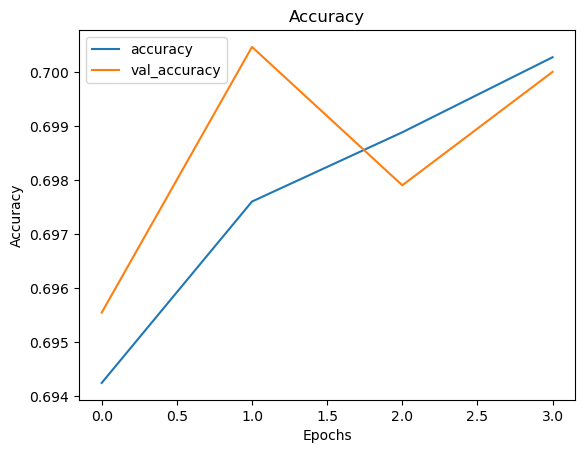

In [176]:
# GRU
model_gru_spec = tf.keras.Sequential(name="model_gru")
model_gru_spec.add(tf.keras.layers.GRU(units=64, input_shape=(129, 3))) 
model_gru_spec.add(tf.keras.layers.Dense(5, activation='softmax'))  
model_gru_spec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  

early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_bilstm_spec.fit(xtrain_spec, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid_spec, yvalid), callbacks = [early_stopping])


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

609/609 - 14s - loss: 1.6347 - accuracy: 0.3425 - 14s/epoch - 23ms/step


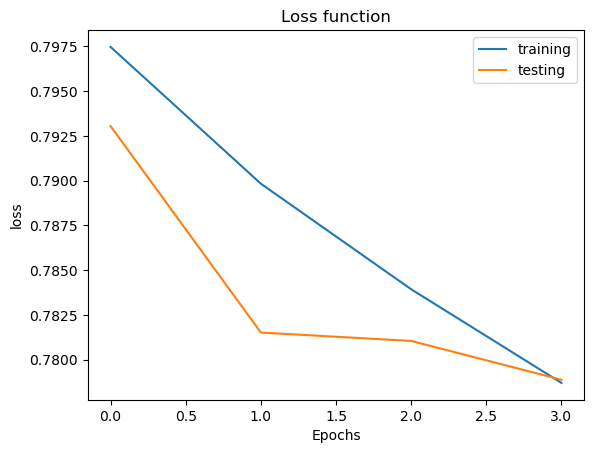

In [177]:

test_loss, test_acc_gruspec = model_gru_spec.evaluate(xvalid_spec,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

Epoch 1/4
880/880 [==============================] - 139s 156ms/step - loss: 0.9265 - accuracy: 0.6498 - val_loss: 0.8563 - val_accuracy: 0.6741
Epoch 2/4
880/880 [==============================] - 133s 151ms/step - loss: 0.8481 - accuracy: 0.6774 - val_loss: 0.8299 - val_accuracy: 0.6833
Epoch 3/4
880/880 [==============================] - 134s 152ms/step - loss: 0.8285 - accuracy: 0.6843 - val_loss: 0.8166 - val_accuracy: 0.6894
Epoch 4/4
880/880 [==============================] - 145s 165ms/step - loss: 0.8154 - accuracy: 0.6882 - val_loss: 0.8172 - val_accuracy: 0.6884


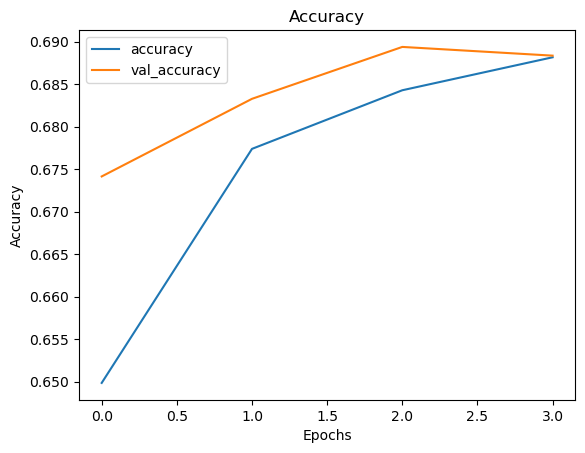

In [178]:
# bi-GRU
model_bigru_spec = tf.keras.Sequential(name="model_bigru")
model_bigru_spec.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=64), input_shape=(129, 3)))
model_bigru_spec.add(tf.keras.layers.Dense(5, activation='softmax')) 
model_bigru_spec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  

early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_bigru_spec.fit(xtrain_spec, ytrain, epochs=4, batch_size = 200,
                    validation_data=(xvalid_spec, yvalid), callbacks = [early_stopping])


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

609/609 - 21s - loss: 0.8172 - accuracy: 0.6884 - 21s/epoch - 34ms/step


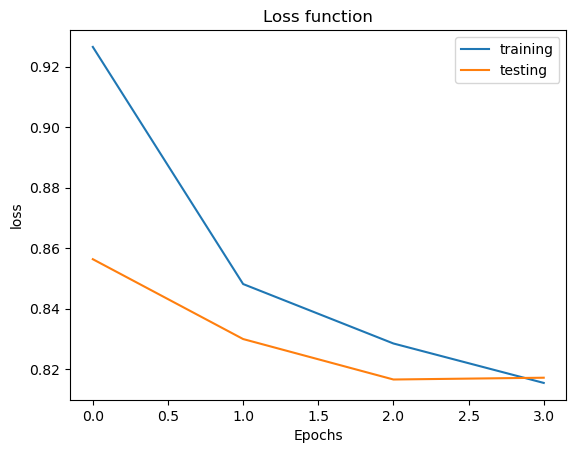

In [179]:

test_loss, test_acc_bigruspec = model_bigru_spec.evaluate(xvalid_spec,  yvalid, verbose=2)

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss function')
plt.legend()

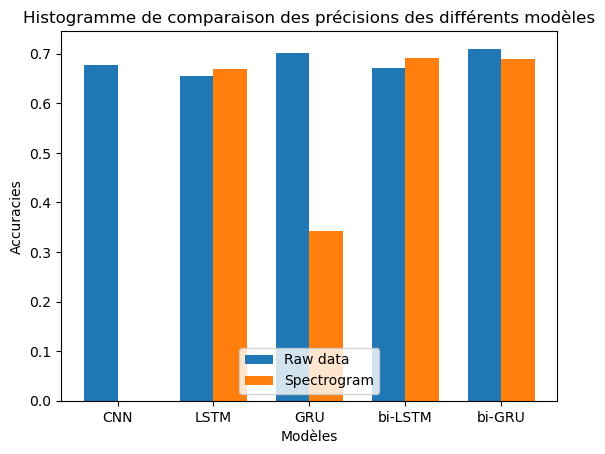

In [187]:
# Tableau comparatif global entre LSTM et GRU
categories = ['CNN', 'LSTM', 'GRU', 'bi-LSTM', 'bi-GRU']
values1 = [test_acc_cnn, test_acc_lstm,test_acc_gru,test_acc_bilstm,test_acc_bigru] 
values2 = [0, test_acc_lstmspec, test_acc_gruspec, test_acc_bilstmspec, test_acc_bigruspec]  

bar_width = 0.35

x = np.arange(len(categories))

plt.bar(x - bar_width/2, values1, width=bar_width, label='Raw data')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Spectrogram')


plt.xlabel('Modèles')
plt.ylabel('Accuracies')
plt.title('Histogramme de comparaison des précisions des différents modèles')
plt.xticks(x, categories)  
plt.legend(loc='lower center') 

plt.show()

Globalement, travailler sur les spectrogrammes prends moins de temps que de travailler directement sur les datas. J'aurai clairement du essayer de monter les epoch mais cela prenait un temps considérable et je pense plutôt travailler sur les transformers plutôt que sur ces modèles (et si je me rends compte qu'avec les transformers on est moins performant alors je reviendrai sur ces modèles). En regardant seulement les accuracy, le modèle qu'on pourra éventuellement choisir ici semble être le bi-GRU sur les raw data mais comme ça a pris un temps fou, peut être qu'on pourra seulement augmenter l'epoch sur les spectrogramme du bi-GRU dans le cas où les transformers ne marchent pas bien

# Transformers

In [23]:
# Different layers
import inspect
from tensorflow.keras.layers import LayerNormalization, Layer
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D

from tensorflow.keras import Model, Sequential

# For evaluation
from sklearn import metrics

# For plotting
import matplotlib.pyplot as plt
import keras_nlp
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [24]:
print(tf.__version__)

2.17.0-dev20240513


je ne comprends pas il marchait mais j'ai essayé de passer sur GPU et je n'ai pas réussi à le réinstaller le package keras-nlp même en changeant d'environnement j'abandonne 

In [55]:
from tensorflow.keras.layers import LayerNormalization, Layer, Dense, ReLU, Dropout
from tensorflow.keras.layers import MultiHeadAttention


# Implementing the Add & Norm Layer
class AddNormalization(Layer):
    def __init__(self, **kwargs):
        super(AddNormalization, self).__init__(**kwargs)
        self.layer_norm = LayerNormalization()  # Layer normalization layer

    def call(self, x, sublayer_x):
        # The sublayer input and output need to be of the same shape to be summed
        add = x + sublayer_x

        # Apply layer normalization to the sum
        return self.layer_norm(add)

# Implementing the Feed-Forward Layer
class FeedForward(Layer):
    def __init__(self, d_ff, d_model, **kwargs):
        super(FeedForward, self).__init__(**kwargs)
        self.fully_connected1 = Dense(d_ff)  # First fully connected layer
        self.fully_connected2 = Dense(d_model)  # Second fully connected layer
        self.activation = ReLU()  # ReLU activation layer

    def call(self, x):
        # The input is passed into the two fully-connected layers, with a ReLU in between
        x_fc1 = self.fully_connected1(x)

        return self.fully_connected2(self.activation(x_fc1))

# Implementing the Encoder Layer
class EncoderLayer(Layer):
    def __init__(self, h, d_k, d_v, d_model, d_ff, rate, **kwargs):
        super(EncoderLayer, self).__init__(**kwargs)
        self.multihead_attention = MultiHeadAttention(h, d_k, d_v, d_model)
        self.dropout1 = Dropout(rate)
        self.add_norm1 = AddNormalization()
        self.feed_forward = FeedForward(d_ff, d_model)
        self.dropout2 = Dropout(rate)
        self.add_norm2 = AddNormalization()

    def call(self, x):
        # Multi-head attention layer
        multihead_output = self.multihead_attention(x, x, x)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in a dropout layer
        multihead_output = self.dropout1(multihead_output)

        # Followed by an Add & Norm layer
        addnorm_output = self.add_norm1(x, multihead_output)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Followed by a fully connected layer
        feedforward_output = self.feed_forward(addnorm_output)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in another dropout layer
        feedforward_output = self.dropout2(feedforward_output)

        # Followed by another Add & Norm layer
        return self.add_norm2(addnorm_output, feedforward_output)

# Implementing the Encoder
class Encoder(Layer):
    def __init__(self, sequence_length, h, d_k, d_v, d_model, d_ff, n, rate, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.pos_encoding = keras_nlp.layers.PositionEmbedding(sequence_length)
        self.dropout = Dropout(rate)
        self.encoder_layer = [EncoderLayer(h, d_k, d_v, d_model, d_ff, rate) for _ in range(n)]

    def call(self, input_sentence):
        # Generate the positional encoding
        pos_encoding_output = self.pos_encoding(input_sentence)
        # Expected output shape = (batch_size, sequence_length, d_model)

        # Add in a dropout layer
        x = self.dropout(pos_encoding_output)

        # Pass on the positional encoded values to each encoder layer
        for i, layer in enumerate(self.encoder_layer):
            x = layer(x)

        return x

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

class Transformer(Model):
    def __init__(self, d_model, input_vocab_size, num_classes, dropout_rate=0.1):
        super(Transformer, self).__init__()

        self.d_model = d_model
        
        self.pooling = GlobalAveragePooling1D()
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.dropout = Dropout(dropout_rate)
        self.flatten = Flatten()
        self.encoder =  Encoder(sequence_length=600,h= 8, d_k=8, d_v=8, d_model=d_model, d_ff=2048, n=1, rate=dropout_rate)
        self.classifier = Dense(num_classes, activation='softmax')

   
    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.encoder(x)
        x = self.pooling(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.classifier(x)
        
        return x

# étiquettes encodées
ytrain_encoded = tf.keras.utils.to_categorical(ytrain, num_classes=5)
yvalid_encoded = tf.keras.utils.to_categorical(yvalid, num_classes=5)


#  rendre positifs les x
xtrain = xtrain + abs(np.min(xtrain)) + 1
xvalid = xvalid + abs(np.min(xvalid)) + 1

xtrain = np.array(xtrain)
xvalid = np.array(xvalid)

transfo = Transformer(d_model=600, input_vocab_size=10000, num_classes=5)




In [57]:
transfo.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
history = transfo.fit(xtrain, ytrain_encoded, epochs=2, batch_size=150,
                      validation_data=(xvalid, yvalid_encoded), callbacks=[early_stopping])

Epoch 1/2


AttributeError: Exception encountered when calling Encoder.call().

[1m'tuple' object has no attribute 'as_list'[0m

Arguments received by Encoder.call():
  • input_sentence=tf.Tensor(shape=(None, 600, 600), dtype=float32)

mon ordi n'est pas capable de faire tourner ce modèle je pense qu'il faut que j'utilise les GPU de google mais je ne sais pas comment les utiliser et je fais tourner sur mon ordi ça fait instantanément crash mon ordi... je vais donc me servir d'un des modèles précédemment utilisé notamment le bigru

# Subject independancies

j'ai remove '5-cassette\\SC4001E0.npz.gz' qui est la première cassette. la nouvelle shape des xtrain etc est (175239, 600) (19401, 600)
(175239,) (19401,) alors qu'avant c'était (175995, 600) (19485, 600)
(175996,) (19485,)

In [50]:
model_cnn1 = tf.keras.Sequential(name="model_cnn")
model_cnn1.add(tf.keras.layers.Reshape((600, 1), input_shape=(600,)))
model_cnn1.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn1.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn1.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model_cnn1.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn1.add(tf.keras.layers.Flatten())
model_cnn1.add(tf.keras.layers.Dense(5, activation='softmax'))  


model_cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_cnn1.fit(xtrain, ytrain, epochs=10, batch_size = 300,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

Epoch 1/10


c:\Users\Justin\anaconda3\envs\projet\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


587/587 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.5051 - loss: 1.7639 - val_accuracy: 0.6579 - val_loss: 0.8956
Epoch 2/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.6673 - loss: 0.8716 - val_accuracy: 0.6735 - val_loss: 0.8410
Epoch 3/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.6773 - loss: 0.8408 - val_accuracy: 0.6788 - val_loss: 0.8246
Epoch 4/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 33s 57ms/step - accuracy: 0.6826 - loss: 0.8217 - val_accuracy: 0.6806 - val_loss: 0.8280
Epoch 5/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - accuracy: 0.6859 - loss: 0.8077 - val_accuracy: 0.6885 - val_loss: 0.8047
Epoch 6/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.6896 - loss: 0.8000 - val_accuracy: 0.6916 - val_loss: 0.8046
Epoch 7/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.6945 - loss: 0.7889 - val_accuracy: 0.6854 - val_loss: 0.8102
Epoch 8/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.6959 - loss: 0.7826 - val_accurac

In [51]:
xtrain_rem = xtrain[756:]
ytrain_rem = ytrain[756:]
xtrain_rem.shape, ytrain_rem.shape

(TensorShape([175239, 600]), TensorShape([175239]))

In [52]:
model_cnn = tf.keras.Sequential(name="model_cnn")
model_cnn.add(tf.keras.layers.Reshape((600, 1), input_shape=(600,)))
model_cnn.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(5, activation='softmax'))  


model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_cnn.fit(xtrain_rem, ytrain_rem, epochs=10, batch_size = 300,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

Epoch 1/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.5320 - loss: 1.5346 - val_accuracy: 0.6591 - val_loss: 0.8809
Epoch 2/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.6675 - loss: 0.8640 - val_accuracy: 0.6745 - val_loss: 0.8463
Epoch 3/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.6764 - loss: 0.8386 - val_accuracy: 0.6664 - val_loss: 0.8676
Epoch 4/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.6815 - loss: 0.8278 - val_accuracy: 0.6770 - val_loss: 0.8378
Epoch 5/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.6846 - loss: 0.8156 - val_accuracy: 0.6691 - val_loss: 0.8501
Epoch 6/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.6843 - loss: 0.8135 - val_accuracy: 0.6707 - val_loss: 0.8376
Epoch 7/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.6869 - loss: 0.8017 - val_accuracy: 0.6701 - val_loss: 0.8470
Epoch 8/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.6897 - loss: 0.7943 - 

In [53]:
from sklearn.metrics import classification_report
y_pred = model_cnn.predict(xvalid)
print(classification_report(yvalid.numpy(), y_pred.argmax(axis=1)))

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      6540
           1       0.33      0.17      0.22      2122
           2       0.65      0.78      0.71      6922
           3       0.82      0.36      0.50      1277
           4       0.56      0.53      0.54      2623

    accuracy                           0.67     19484
   macro avg       0.63      0.53      0.56     19484
weighted avg       0.66      0.67      0.65     19484



In [54]:
from sklearn.metrics import classification_report
y_pred = model_cnn1.predict(xvalid)
print(classification_report(yvalid.numpy(), y_pred.argmax(axis=1)))

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6540
           1       0.33      0.15      0.20      2122
           2       0.64      0.85      0.73      6922
           3       0.78      0.46      0.58      1277
           4       0.61      0.51      0.56      2623

    accuracy                           0.69     19484
   macro avg       0.64      0.56      0.58     19484
weighted avg       0.67      0.69      0.67     19484



La différence est vraiment infime quand on regarde seulement l'accuracy (0.02)... on va voir si en rajoutant quelques portions on arrive à se rapprocher de l'accuracy (je rajoute 200 séries)

In [8]:
xtrain_rem = xtrain[556:]
ytrain_rem = ytrain[556:]
xtrain_rem.shape, ytrain_rem.shape

(TensorShape([175439, 600]), TensorShape([175439]))

In [9]:
model_cnn = tf.keras.Sequential(name="model_cnn")
model_cnn.add(tf.keras.layers.Reshape((600, 1), input_shape=(600,)))
model_cnn.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(5, activation='softmax'))  


model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_cnn.fit(xtrain_rem, ytrain_rem, epochs=10, batch_size = 300,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

Epoch 1/10


c:\Users\Justin\anaconda3\envs\projet\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.5145 - loss: 1.7658 - val_accuracy: 0.6580 - val_loss: 0.8953
Epoch 2/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6598 - loss: 0.8822 - val_accuracy: 0.6757 - val_loss: 0.8370
Epoch 3/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.6781 - loss: 0.8331 - val_accuracy: 0.6825 - val_loss: 0.8242
Epoch 4/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.6816 - loss: 0.8220 - val_accuracy: 0.6825 - val_loss: 0.8189
Epoch 5/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.6861 - loss: 0.8096 - val_accuracy: 0.6645 - val_loss: 0.8498
Epoch 6/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.6882 - loss: 0.8048 - val_accuracy: 0.6842 - val_loss: 0.8150
Epoch 7/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.6949 - loss: 0.7867 - val_accuracy: 0.6856 - val_loss: 0.8073
Epoch 8/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.6972 - loss: 0.7790 - val_accurac

In [10]:
from sklearn.metrics import classification_report
y_pred = model_cnn.predict(xvalid)
print(classification_report(yvalid.numpy(), y_pred.argmax(axis=1)))

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6540
           1       0.33      0.17      0.23      2122
           2       0.61      0.89      0.72      6922
           3       0.79      0.49      0.61      1277
           4       0.71      0.44      0.55      2623

    accuracy                           0.68     19484
   macro avg       0.66      0.55      0.58     19484
weighted avg       0.69      0.68      0.67     19484



on remarque une petite augmentation de l'accuracy, essayons de rajouter encore 200 séries

In [11]:
xtrain_rem = xtrain[356:]
ytrain_rem = ytrain[356:]
xtrain_rem.shape, ytrain_rem.shape

(TensorShape([175639, 600]), TensorShape([175639]))

In [12]:
model_cnn = tf.keras.Sequential(name="model_cnn")
model_cnn.add(tf.keras.layers.Reshape((600, 1), input_shape=(600,)))
model_cnn.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(5, activation='softmax'))  


model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
early_stopping = EarlyStopping(monitor = 'val_loss', patience =20)
history = model_cnn.fit(xtrain_rem, ytrain_rem, epochs=10, batch_size = 300,
                    validation_data=(xvalid, yvalid), callbacks = [early_stopping])

Epoch 1/10


c:\Users\Justin\anaconda3\envs\projet\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


586/586 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.4958 - loss: 1.7129 - val_accuracy: 0.6523 - val_loss: 0.8970
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.6626 - loss: 0.8749 - val_accuracy: 0.6695 - val_loss: 0.8515
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.6742 - loss: 0.8428 - val_accuracy: 0.6759 - val_loss: 0.8356
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6824 - loss: 0.8257 - val_accuracy: 0.6827 - val_loss: 0.8219
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.6864 - loss: 0.8112 - val_accuracy: 0.6877 - val_loss: 0.8121
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.6909 - loss: 0.8010 - val_accuracy: 0.6851 - val_loss: 0.8138
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.6941 - loss: 0.7923 - val_accuracy: 0.6868 - val_loss: 0.8182
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.6983 - loss: 0.7812 - val_accurac

In [13]:
from sklearn.metrics import classification_report
y_pred = model_cnn.predict(xvalid)
print(classification_report(yvalid.numpy(), y_pred.argmax(axis=1)))

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      6540
           1       0.36      0.10      0.16      2122
           2       0.63      0.87      0.73      6922
           3       0.70      0.61      0.65      1277
           4       0.65      0.49      0.56      2623

    accuracy                           0.69     19484
   macro avg       0.63      0.57      0.58     19484
weighted avg       0.68      0.69      0.67     19484



On vient de regagner les mêmes caractéristiques que si on avait pas enlevé un patients. 400 données temporelles * 30 secondes sont donc inutiles entre guillemet pour augmenter l'accuracy du modèle